In [1]:
#import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
dpi=150

import numpy as np
import oxyba as ox
from importlib import reload; reload(ox);

### Example 1

In the first example three continous ratio scaled uniform distributed random variables are generated.
As expected all Spearman rank correlations are zero. 
The `corr_rank` function will print a warning message because it detected that one or more variables are most likely not ordinal scale variables.

/Users/uh/Github/oxyba/oxyba/corr_rank.py:43: UserWarning: number of observations equals the number of unique values.
  warnings.warn(msg)


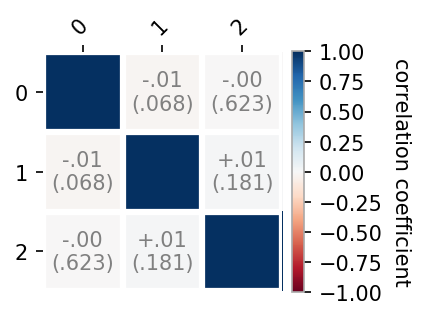

In [2]:
x = np.random.uniform(0,3, (10000,3))
rho, pval = ox.corr_rank(x)
ox.heatmap_corr(rho, pval, dpi=dpi);

### Example 2

The second example will use random integers as data. 
The function `corr_rank` will assume that such kind or sortable discrete data is ordinal or resp. an encoding of ordinal labels, i.e. no waring message.
Still no rank correlation as expected.

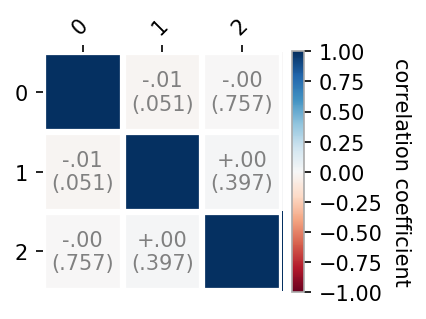

In [3]:
x = np.random.randint(0,3, (10000,3))
rho, pval = ox.corr_rank(x)
ox.heatmap_corr(rho, pval, dpi=dpi);

### Example 3

The third example will use the Boston demo dataset.

In [4]:
from sklearn.datasets import load_boston
tmp = load_boston()

First, find ordinal data. 
However, be aware that `ox.isordinal` would als return `True` for nominal scale labels or encoded nominal data.
Afterwards, pick only the potentially ordinal scaled data (or nominal data).

In [5]:
idx = list();
for j in range(tmp.data.shape[1]):
    flag, msg = ox.isordinal(tmp.data[:,j])
    print(j, msg)
    if flag: idx.append(j)
        
idx = np.array(idx)
names = tmp.feature_names[idx]
x = tmp.data[:,idx]

0 elements are not integer or strings.
1 elements are not integer or strings.
2 elements are not integer or strings.
3 is ordinal
4 elements are not integer or strings.
5 elements are not integer or strings.
6 elements are not integer or strings.
7 elements are not integer or strings.
8 is ordinal
9 is ordinal
10 elements are not integer or strings.
11 elements are not integer or strings.
12 elements are not integer or strings.


First, let's compute the Spearman Rank Correlation Matrix.

Det(rho) =  0.49902567024947175


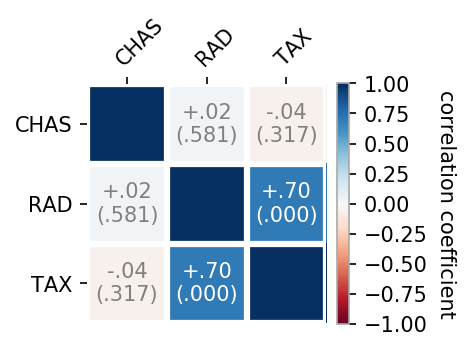

In [6]:
rho, pval = ox.corr_rank(x)
print("Det(rho) = ", np.linalg.det(rho))
ox.heatmap_corr(rho, pval, names, dpi=dpi);

And compare it with Kendall's tau Rank Correlation

Det(tau) =  0.6857126429788132


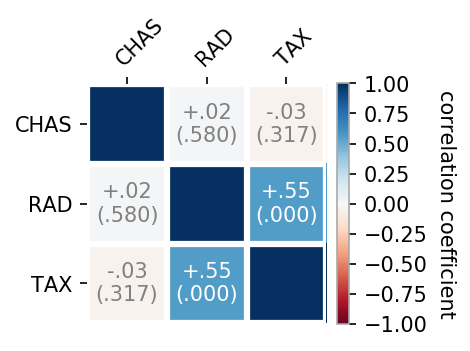

In [7]:
tau, pval = ox.corr_tau(x)
print("Det(tau) = ", np.linalg.det(tau))
ox.heatmap_corr(tau, pval, names, dpi=dpi);

The absolute Spearman's rho is usually higher than Kendall's tau.